0.872946454848 *x^ 1
0.106628642576 *x^ 0


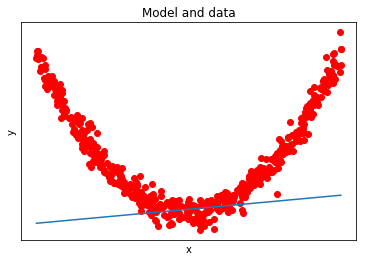

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

def compute_gradient(H, y, w):

    # write gradient computation code
    
    return 0

# y = x^2 + 3

# generate function data
x = np.random.uniform(-10, 10, size=500)
x.sort()
y = x*x + 3

#generate noisy funtion
noise = np.random.normal(-5, 5, size=500)
noisy_y = y + noise

# reshape vectors
x = x.reshape((500,1))
y = y.reshape((500,1))
noisy_y = noisy_y.reshape((500,1))

# constant feature
constant = np.ones((500,1))
x_2 = x*x

features = np.hstack([constant, x])

params = 2

# grsdient descent

# gradient descent is sensitive to this values
# if eta (step size) is too big, it won't converge

eta = .00000001

w = np.random.random((params,1))

gradient = compute_gradient(features, noisy_y, w)
#gradient_transpose = np.matrix.transpose(gradient)
#gradient_magnitude = math.sqrt(np.dot(gradient_transpose, gradient))
i = 0

# because we are experimenting with some functions to don't fit well, we are using a fixed sized loop
while (i < 1000):
    i = i + 1

    # fill-in loop
    
    #gradient_transpose = np.matrix.transpose(gradient)
    #gradient_magnitude = math.sqrt(np.dot(gradient_transpose, gradient))

# print learned weights
j = params
while (j > 0):
    j = j-1
    print (w[j,0],"*x^",j)
    
# plot point y and line f(x)

# plot points
X = x[:,0]
Y = noisy_y[:,0]
a=[[X,Y]]
plt.plot(*zip(*a), marker='o', color='r', ls='')

# plot regression line
m = X.shape[0]
f = []
i = 0
while (i < m):
    j = 0
    value = 0
    while (j < params):
        weight = w[j,0]
        value = value + weight*math.pow(X[i],j)
        j = j + 1
    f.append(value)
    i = i + 1
l1, = plt.plot(X, f)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Model and data')
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression

# y = x^2 + 3

# generate function data
x = np.random.uniform(-10, 10, size=500)
x.sort()
y = x*x + 3

#generate noisy funtion
noise = np.random.normal(-5, 5, size=500)
noisy_y = y + noise

# reshape vectors
x = x.reshape((500,1))
y = y.reshape((500,1))
noisy_y = noisy_y.reshape((500,1))

# constant feature
constant = np.ones((500,1))
x_2 = x*x

features = np.hstack([constant, x, x_2])

#lr = LinearRegression(fit_intercept=False)
lr = LinearRegression()
lr.fit(features,y)

print (lr.coef_)
print (lr.intercept_)

[[  0.00000000e+00  -1.99840144e-15   1.00000000e+00]]
[ 3.]


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

house_df = pd.read_csv('kc_house_data.csv')
#print(house_df.columns)

house_df_Y = pd.DataFrame()
house_df_Y['price'] = house_df.loc[:,'price']

house_df_X = pd.DataFrame()
rows = house_df.shape[0]
house_df_X['constant'] = np.ones(rows)
house_df_X['sqft'] = house_df.loc[:,'sqft_living']
house_df_X['bedrooms'] = house_df.loc[:,'bedrooms']
house_df_X['bathrooms'] = house_df.loc[:,'bathrooms']
house_df_X['floors'] = house_df.loc[:,'floors']
house_df_X['yr_built'] = house_df.loc[:,'yr_built']
X = house_df_X.as_matrix()
y = house_df_Y.as_matrix()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75)

lr = LinearRegression()
lr.fit(X_train,y_train)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print ("Score on training data:", train_score)
print ("Score on test data:", test_score)

FileNotFoundError: File b'kc_house_data.csv' does not exist